# Week 2: Transition from Machine Learning to Neural Networks

**Objective:** This notebook bridges the gap between classical Machine Learning (like the Logistic Regression we built in Week 1) and Deep Learning. We will explore the limitations of traditional ML, understand the fundamental logic and structure of Artificial Neural Networks (ANNs), and build our first neural network using Keras.

**Core Concepts Covered:**
* **ML vs. DL:** The limits of manual feature extraction and the rise of Deep Learning.
* **Artificial Neural Networks (ANNs):** The structure of a neuron (weights, bias) and the concept of layers (Input, Hidden, Output).
* **Activation Functions:** Why we need non-linearity (e.g., ReLU, Sigmoid, Softmax).
* **Training:** Conceptual overview of Forward Pass, Loss Functions, Backpropagation, and Optimizers (like Adam).
* **Keras:** Using the `Sequential` model with `Dense` layers to build our first network.
* **Intro to CNNs:** A brief look at why specialized networks are needed for image data.

---

## Part 1: The "Why" - Limitations of Traditional ML

In Week 1, we built a Logistic Regression model for the Titanic and Diabetes datasets. We spent a significant amount of time on **feature engineering**:

* Converting `Sex` (male/female) into numbers (0/1).
* Creating a `FamilySize` feature from `SibSp` and `Parch`.
* Deciding which columns to drop (`Cabin`, `Name`).

This manual process, called **feature extraction**, is a major limitation of traditional ML. The model's performance is entirely dependent on how well the human expert designs these features.

**Deep Learning (DL)**, a subfield of ML, aims to solve this. A deep neural network learns the best features *automatically* from the raw data (like pixels in an image or words in a sentence) through its layered structure.

---

## Part 2: The Building Blocks of a Neural Network

Let's conceptually build a network from the ground up, based on the presentation slides.

### 2.1 - The Artificial Neuron

The fundamental unit of a neural network is the **artificial neuron**. It mimics a biological neuron.

It works in three steps:
1.  **Inputs:** It receives one or more input values ($x_1, x_2, ..., x_n$).
2.  **Weighted Sum:** Each input ($x_i$) is multiplied by a **weight** ($w_i$), which represents the input's importance. A **bias** ($b$) is added to this sum. This is the **summation function**.
    > $Sum = (x_1 \cdot w_1) + (x_2 \cdot w_2) + ... + (x_n \cdot w_n) + b$
3.  **Activation:** The final sum is passed through an **activation function** ($f$) to produce the neuron's output.
    > $Output = f(Sum)$

### 2.2 - Activation Functions

The activation function's job is to introduce **non-linearity** into the network. Without this, the entire network would just be one big linear equation, no more powerful than simple Logistic Regression.

Common activation functions:
* **Sigmoid:** Squashes values to a range between 0 and 1. Useful for the **output layer** in binary classification (like our Week 1 models).
* **ReLU (Rectified Linear Unit):** $Output = max(0, Sum)$. It's very fast and efficient, making it the most common choice for **hidden layers**.
* **Softmax:** Used for multi-class classification (e.g., digits 0-9) at the **output layer**. It converts outputs into a probability distribution, where all neuron outputs sum to 1.

### 2.3 - Network Structure (Layers)

Neurons are organized into layers:
1.  **Input Layer:** Receives the raw data. The number of neurons here equals the number of features in our dataset.
2.  **Hidden Layer(s):** The layers between input and output. This is where the network extracts complex patterns and features from the data.
3.  **Output Layer:** Produces the final prediction.

A "Deep" Neural Network is simply a network with one or more hidden layers.

### 2.4 - How a Network Learns (Conceptual)

Training is the process of finding the optimal **weights** and **biases** for all the connections in the network. This is done iteratively:

1.  **Forward Pass:** Data is fed into the input layer, and it flows through the network to the output layer to make a prediction.
2.  **Compute Loss:** A **loss function** (e.g., `binary_crossentropy`) measures how wrong the prediction is compared to the true value.
3.  **Backward Pass (Backpropagation):** The network calculates the *gradient* of the loss (how much each weight/bias contributed to the error) and adjusts them slightly to minimize the error.
4.  **Optimization:** An **optimizer** (like SGD or Adam) is the algorithm that manages this weight update process.

We repeat this process for many **epochs** (one full pass through the entire training dataset).

---

## Part 3: Application - Building a Neural Network with Keras

Let's apply these concepts to the "Hello, World!" of Deep Learning: the **MNIST dataset**. MNIST is a collection of 70,000 grayscale images of handwritten digits (0-9).

### 3.1 - Setup and Imports

We will use `tensorflow` and its high-level API `keras`.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

### 3.2 - Load and Prepare the Data (MNIST)

First, we load the data. It's conveniently included in Keras.

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


Let's look at one of the images.

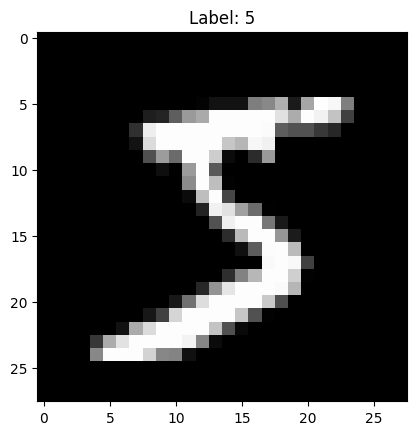

In [3]:
# Display the first image in the training set
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

#### Preprocessing the Data

A simple `Dense` network can't understand 2D images (28x28 pixels). We must **flatten** the images into 1D vectors (28 * 28 = 784 pixels).

1.  **Flattening:** `(60000, 28, 28)` -> `(60000, 784)`
2.  **Normalization:** We'll scale pixel values from 0-255 down to 0-1. This helps the network train faster and more stably.
3.  **One-Hot Encoding:** We'll convert the labels (e.g., `5`) into vectors (e.g., `[0,0,0,0,0,1,0,0,0,0]`). This is necessary for a `softmax` output layer.

In [4]:
# 1. Flatten the images
# We can use the Flatten layer in the model, or do it manually:
X_train_flat = X_train.reshape(X_train.shape[0], 784)
X_test_flat = X_test.reshape(X_test.shape[0], 784)
print(f"Flattened training data shape: {X_train_flat.shape}")

# 2. Normalize the pixel values
X_train_norm = X_train_flat.astype('float32') / 255.0
X_test_norm = X_test_flat.astype('float32') / 255.0

# 3. One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(f"Original label (y_train[0]): {y_train[0]}")
print(f"One-hot label (y_train_cat[0]): {y_train_cat[0]}")

Flattened training data shape: (60000, 784)
Original label (y_train[0]): 5
One-hot label (y_train_cat[0]): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 3.3 - Building the Sequential Model

Now we'll build our 3-layer network (1 Input, 1 Hidden, 1 Output)

In [5]:
# Adım 1: Modeli Tanımla (Step 1: Define the Model)
model = Sequential([
    # Input layer: 784 neurons (one for each pixel)
    # First Hidden layer: 128 neurons, using 'relu' activation
    Dense(128, input_dim=784, activation='relu'),
    
    # (Optional) Add a second hidden layer to make it 'deeper'
    Dense(64, activation='relu'),
    
    # Output layer: 10 neurons (one for each digit 0-9)
    # 'softmax' activation to get probabilities for each class
    Dense(10, activation='softmax')
])

# Display the model's architecture
model.summary()

C:\Users\berkd\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### 3.4 - Compiling the Model

Before training, we must *compile* the model, specifying its loss function and optimizer.

In [6]:
# Adım 2: Modeli Derle (Step 2: Compile the Model)
model.compile(
    optimizer='adam',  # Adam is a very effective and popular optimizer
    loss='categorical_crossentropy', # Use this loss for multi-class, one-hot labels
    metrics=['accuracy'] # We want to track accuracy during training
)

### 3.5 - Training the Model

Now we fit the model to our training data. We'll train for 10 **epochs** and set aside 20% of the training data for **validation** to check for overfitting.

In [7]:
# Adım 3: Modeli Eğit (Step 3: Train the Model)
print("Starting model training...")
history = model.fit(
    X_train_norm, 
    y_train_cat, 
    epochs=10, 
    batch_size=32, 
    validation_split=0.2 # Use 20% of data for validation
)
print("Training complete!")

Starting model training...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9218 - loss: 0.2644 - val_accuracy: 0.9596 - val_loss: 0.1327
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9675 - loss: 0.1074 - val_accuracy: 0.9644 - val_loss: 0.1143
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9768 - loss: 0.0751 - val_accuracy: 0.9690 - val_loss: 0.1050
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9823 - loss: 0.0570 - val_accuracy: 0.9709 - val_loss: 0.0981
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9854 - loss: 0.0451 - val_accuracy: 0.9741 - val_loss: 0.0920
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9883 - loss: 0.0362 - val_accuracy: 0.9757 - val_loss: 0.0912
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9895 - loss: 0.0299 - val_accuracy: 0.9754 - val_loss: 0.0918
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accurac

---

## Part 4: Evaluating Our First Neural Network

The `history` object contains the accuracy and loss for each epoch. We can visualize this to see how our model learned.

### 4.1 - Visualizing Training History (Loss and Accuracy)

This is a critical step. We want to see:
1.  **Loss:** The training and validation loss should both decrease.
2.  **Accuracy:** The training and validation accuracy should both increase.

If validation loss starts to *increase* while training loss *decreases*, our model is **overfitting**!

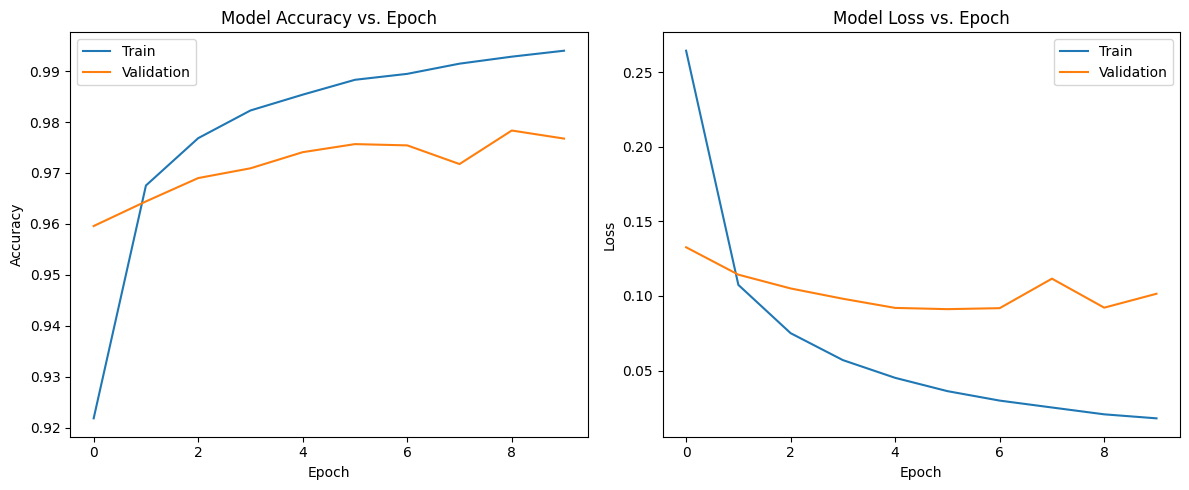

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

### 4.2 - Evaluating on the Test Set

Let's see the final performance on the unseen test data.

In [9]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test_norm, y_test_cat)
print(f'\nTest Accuracy: {test_acc*100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.0896

Test Accuracy: 97.64%
Test Loss: 0.0896


### 4.3 - Confusion Matrix

Just like in Week 1, a confusion matrix helps us see *where* the model is making mistakes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


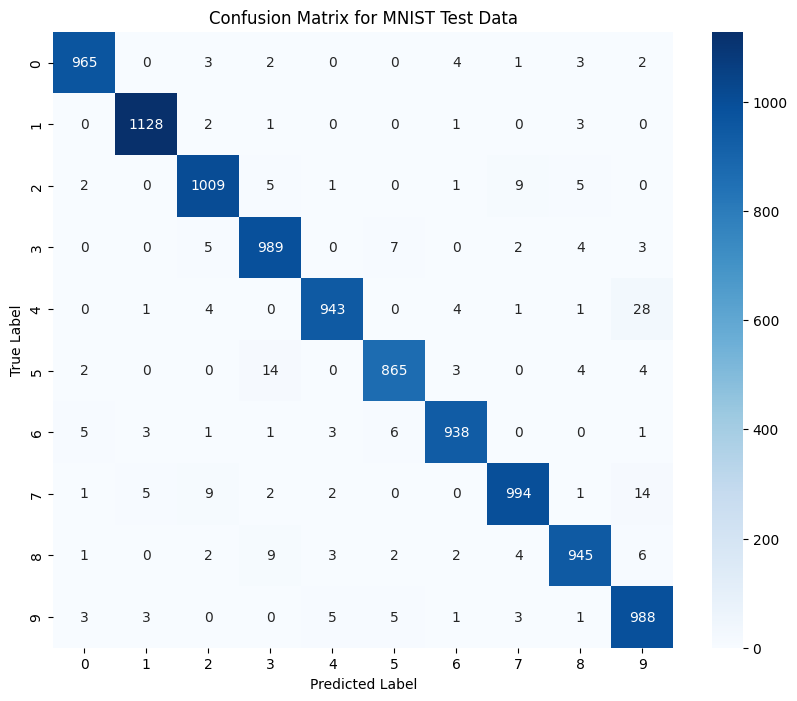

In [10]:
# Get predictions for the test set
y_pred_probs = model.predict(X_test_norm)
y_pred_classes = np.argmax(y_pred_probs, axis=1) # Convert from one-hot back to single digits

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MNIST Test Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

---

## Part 5: Next Steps - Why We Need CNNs

Our simple `Dense` network (also called a Multi-Layer Perceptron or MLP) performed very well! However, it has a major flaw for image data:

**By flattening the image from 28x28 to 784, we threw away all spatial information!** The network doesn't know that pixel 1 and pixel 2 are next to each other, or that pixel 1 and pixel 29 are above/below each other.

For complex visual tasks (like identifying cats vs. dogs), this spatial relationship is critical. 

This is why **Convolutional Neural Networks (CNNs)** were invented. CNNs are specifically designed to process visual data. They use special layers (`Convolution`, `Pooling`) to automatically learn local features like edges, textures, and shapes, preserving the 2D structure of the image.

We will dive into CNNs in our next session.

---

## ✍️ Week 2 Homework

**Task:** Build two different neural network models using a dataset of your choice (you can re-use the *Diabetes* dataset from Week 1) and compare their results.

**Instructions:**
1.  Load and preprocess your chosen dataset (make sure all data is numerical and scaled!).
2.  **Model 1:** Build a simple Keras `Sequential` model (e.g., 1 hidden layer with `relu` activation).
3.  **Model 2:** Build a second model. Change something, for example:
    * Add more `Dense` layers (make it deeper).
    * Change the number of neurons in the layers.
    * Try a different activation function (like `tanh`).
    * Try a different optimizer (like `sgd`).
4.  Train both models and plot their accuracy/loss curves.
5.  In a markdown cell, write a brief comparison of their performance. Which model was better? Why do you think that is?

### Homework Setup: Imports
We'll use the Diabetes dataset from Week 1.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Make sure you have the 'diabetes.csv' file in the same directory as this notebook!
# This file was used in the Week 1 notebook.

### Step 1: Load and Preprocess the Diabetes Dataset

In [ ]:
# Load data
try:
    diabetes_df = pd.read_csv('diabetes.csv')
    print("Diabetes dataset loaded successfully.")
    print(diabetes_df.head())
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please add it to your project folder.")

# Data quality check: Replace 0s with NaN for medical features
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_df[columns_to_replace] = diabetes_df[columns_to_replace].replace(0, np.nan)

# Impute NaN values with the median of the column
for col in columns_to_replace:
    diabetes_df[col].fillna(diabetes_df[col].median(), inplace=True)

print("\nData after cleaning 0-values:")
print(diabetes_df.describe())

Diabetes dataset loaded successfully.
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data after cleaning 0-values:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std   

C:\Users\berkd\AppData\Local\Temp\ipykernel_28592\3904846968.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df[col].fillna(diabetes_df[col].median(), inplace=True)
C:\Users\berkd\AppData\Local\Temp\ipykernel_28592\3904846968.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [ ]:
# Define features (X) and target (y)
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nInput features (shape): {X_train_scaled.shape[1]}")


Input features (shape): 8


### Step 2: Model 1 - Simple Network (Baseline)
Let's build a simple network with 1 hidden layer.

In [ ]:
# Get the number of input features
input_features = X_train_scaled.shape[1]

# Define Model 1
model_1 = Sequential([
    # Input layer (8 features) and 1st hidden layer (12 neurons)
    Dense(12, input_dim=input_features, activation='relu'),
    
    # Output layer (1 neuron, 'sigmoid' for binary classification)
    Dense(1, activation='sigmoid') 
])

# Compile Model 1
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("--- Training Model 1 ---")
# Train Model 1
history_1 = model_1.fit(
    X_train_scaled, 
    y_train, 
    epochs=50, # Train for more epochs to see the trend
    validation_split=0.2, 
    verbose=0 # Set to 0 to make training silent
)

print("Model 1 training complete.")
model_1.summary()

C:\Users\berkd\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- Training Model 1 ---
Model 1 training complete.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244 (980.00 B)

### Step 3: Model 2 - Your Custom Network
Now, build your second model. Try making it deeper (add a layer) or wider (more neurons).

In [ ]:
# Define Model 2 (e.g., a deeper network)
model_2 = Sequential([
    Dense(32, input_dim=input_features, activation='relu'), # Wider 1st layer
    Dense(16, activation='relu'), # Added 2nd hidden layer
    Dense(1, activation='sigmoid') # Output layer
])

# Compile Model 2
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("--- Training Model 2 ---")
# Train Model 2
history_2 = model_2.fit(
    X_train_scaled, 
    y_train, 
    epochs=50, 
    validation_split=0.2, 
    verbose=0
)

print("Model 2 training complete.")
model_2.summary()

--- Training Model 2 ---
Model 2 training complete.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,501 (9.77 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,668 (6.52 KB)

### Step 4: Compare Models
Let's plot the validation accuracy of both models on the same chart.

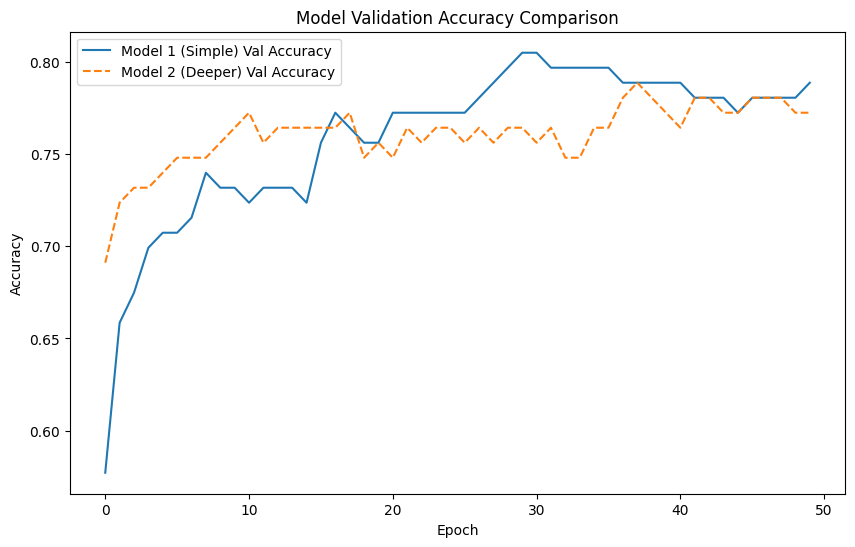

--- Test Set Evaluation ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7532 - loss: 0.4958
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7468 - loss: 0.5706
Model 1 (Simple) Test Accuracy: 75.32%
Model 2 (Deeper) Test Accuracy: 74.68%


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['val_accuracy'], label='Model 1 (Simple) Val Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Model 2 (Deeper) Val Accuracy', linestyle='--')
plt.title('Model Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate both models on the test set
print("--- Test Set Evaluation ---")
loss_1, acc_1 = model_1.evaluate(X_test_scaled, y_test)
loss_2, acc_2 = model_2.evaluate(X_test_scaled, y_test)

print(f'Model 1 (Simple) Test Accuracy: {acc_1*100:.2f}%')
print(f'Model 2 (Deeper) Test Accuracy: {acc_2*100:.2f}%')

### Step 5: Your Analysis

*(Write your comparison here!)*

* Which model had the better final test accuracy?
* Looking at the graph, did one model learn faster?
* Did one model show more signs of overfitting (a large gap between training and validation accuracy)?
* What could you try for a 'Model 3'?